In [ ]:
!pip install kaggle


In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess


Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 97% 414M/428M [00:02<00:00, 136MB/s]
100% 428M/428M [00:02<00:00, 153MB/s]


In [ ]:
!unzip toronto-emotional-speech-set-tess.zip -d /content/tess


Streaming output truncated to the last 5000 lines.
  inflating: /content/tess/TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: /content/tess/TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: /content/tess/TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: /content/tess/TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: /content/tess/TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: /content/tess/TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: /content/tess/TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: /content/tess/TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: /content/tess/TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: /content/tess/TESS Toronto emotional speech set data/OAF_angry/OA

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from keras import utils
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Load dataset paths and labels
paths = []
labels = []

# Traverse through the directory to collect paths and labels
for dirname, _, filenames in os.walk('/content/tess'):
    for filename in filenames:
        if filename.endswith('.wav'):  # Ensure only audio files are processed
            paths.append(os.path.join(dirname, filename))
            label = filename.split('_')[-1]
            label = label.split('.')[0]
            labels.append(label.lower())
    if len(paths) == 2800:
        break

print('Dataset is loaded')


Dataset is loaded


In [ ]:
# Display the number of paths loaded
print(len(paths))

2800


In [ ]:
# Display first 5 paths and labels
print(paths[:5])
print(labels[:5])

['/content/tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_pearl_sad.wav', '/content/tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_learn_sad.wav', '/content/tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_sell_sad.wav', '/content/tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_dodge_sad.wav', '/content/tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_chief_sad.wav']
['sad', 'sad', 'sad', 'sad', 'sad']


In [ ]:
# Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels

In [ ]:
# Display the first few rows of the dataframe
print(df.head())

                                              speech label
0  /content/tess/tess toronto emotional speech se...   sad
1  /content/tess/tess toronto emotional speech se...   sad
2  /content/tess/tess toronto emotional speech se...   sad
3  /content/tess/tess toronto emotional speech se...   sad
4  /content/tess/tess toronto emotional speech se...   sad


In [ ]:
# Display the first few rows of the dataframe
print(df.head())

                                              speech label
0  /content/tess/tess toronto emotional speech se...   sad
1  /content/tess/tess toronto emotional speech se...   sad
2  /content/tess/tess toronto emotional speech se...   sad
3  /content/tess/tess toronto emotional speech se...   sad
4  /content/tess/tess toronto emotional speech se...   sad


In [ ]:
# Display the value counts of labels
print(df['label'].value_counts())

label
sad        400
angry      400
fear       400
disgust    400
ps         400
happy      400
neutral    400
Name: count, dtype: int64


In [ ]:
# Add a label count column and then drop it
df['label_count']=df['label'].value_counts()

In [ ]:
df.drop('label_count', axis=1, inplace=True)

In [ ]:
# Display dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   speech  2800 non-null   object
 1   label   2800 non-null   object
dtypes: object(2)
memory usage: 43.9+ KB


In [ ]:
%matplotlib inline

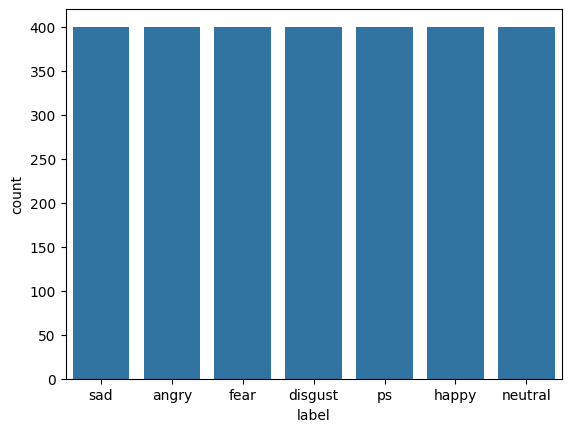

In [ ]:
# Plot label distribution
sns.countplot(data=df, x='label')
plt.show()

In [ ]:
# Function to display waveplot
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

In [ ]:
# Function to display spectrogram
def spectrogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.show()

In [ ]:
# Final DataFrame and label checks
print(df.head())
print(df['label'].unique())
print(df['speech'].unique())

                                              speech label
0  /content/tess/tess toronto emotional speech se...   sad
1  /content/tess/tess toronto emotional speech se...   sad
2  /content/tess/tess toronto emotional speech se...   sad
3  /content/tess/tess toronto emotional speech se...   sad
4  /content/tess/tess toronto emotional speech se...   sad
['sad' 'angry' 'fear' 'disgust' 'ps' 'happy' 'neutral']
['/content/tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_pearl_sad.wav'
 '/content/tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_learn_sad.wav'
 '/content/tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_sell_sad.wav'
 ...
 '/content/tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_germ_fear.wav'
 '/content/tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fea

In [ ]:
# Function to extract MFCC features
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
# Visualize and play audio for different emotions
emotions = ['fear', 'angry', 'disgust', 'neutral', 'sad', 'ps', 'happy']

In [ ]:
for emotion in emotions:
    path = np.array(df['speech'][df['label'] == emotion])[0]
    data, sampling_rate = librosa.load(path)
    waveplot(data, sampling_rate, emotion)
    spectrogram(data, sampling_rate, emotion)
    display(Audio(path))  # Play the audio

In [ ]:
# Extract MFCC features
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
X = np.array([x for x in X_mfcc])

# Expand dimensions
X = np.expand_dims(X, -1)

# One-hot encode labels
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']]).toarray()

print("MFCC features shape:", X.shape)
print("One-hot encoded labels shape:", y.shape)


MFCC features shape: (2800, 40, 1)
One-hot encoded labels shape: (2800, 7)


In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (2240, 40, 1) (2240, 7)
Validation set shape: (560, 40, 1) (560, 7)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Define the model
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40, 1)),  # LSTM layer with 256 units
    Dropout(0.5),  # Dropout layer for regularization
    Dense(128, activation='relu'),  # Dense layer with ReLU activation
    Dropout(0.5),  # Dropout layer for regularization
    Dense(64, activation='relu'),  # Dense layer with ReLU activation
    Dropout(0.5),  # Dropout layer for regularization
    Dense(7, activation='softmax')  # Output layer with 7 classes for classification
])

# Compile the model
model.compile(loss='categorical_crossentropy',  # Loss function for multi-class classification
              optimizer='adam',  # Adam optimizer
              metrics=['accuracy'])  # Metric to monitor

# Print model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train,  # Training data
                    validation_data=(X_val, y_val),  # Validation data
                    epochs=30,  # Number of epochs
                    batch_size=64)  # Batch size


Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 17s 283ms/step - accuracy: 0.2287 - loss: 1.8811 - val_accuracy: 0.5857 - val_loss: 1.0998
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - accuracy: 0.5023 - loss: 1.2050 - val_accuracy: 0.7768 - val_loss: 0.7257
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - accuracy: 0.6998 - loss: 0.8014 - val_accuracy: 0.9179 - val_loss: 0.2923
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 203ms/step - accuracy: 0.8550 - loss: 0.4575 - val_accuracy: 0.9357 - val_loss: 0.1925
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step - accuracy: 0.9008 - loss: 0.3634 - val_accuracy: 0.9161 - val_loss: 0.2446
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - accuracy: 0.9137 - loss: 0.3089 - val_accuracy: 0.9339 - val_loss: 0.2694
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 169ms/step - accuracy: 0.9209 - loss: 0.2661 - val_accuracy: 0.9518 - val_loss: 0.1706
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 218ms/step - accuracy: 0.9347 - loss: 0.2279 - val_accura

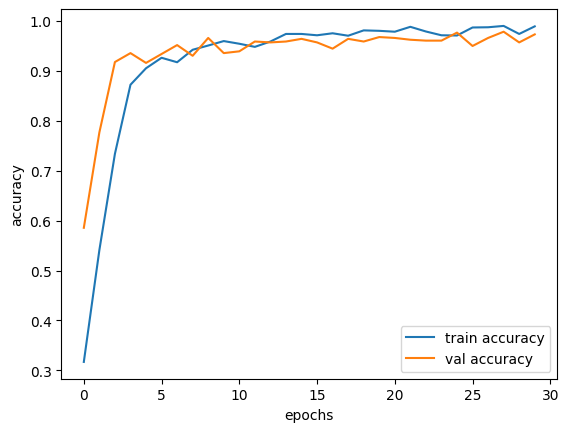

In [ ]:
epochs=list(range(30))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,label='train accuracy')
plt.plot(epochs,val_acc,label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


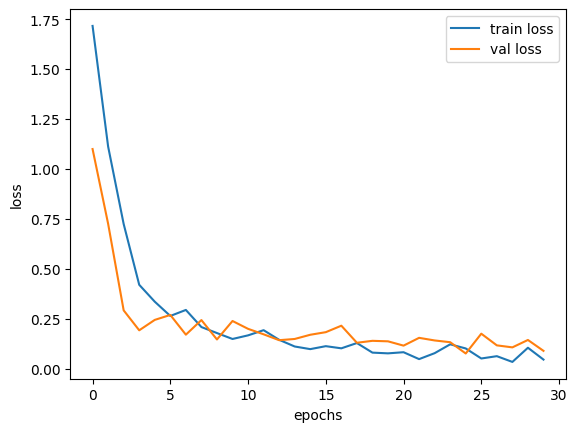

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,label='train loss')
plt.plot(epochs,val_loss,label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[85  1  0  1  0  2  0]
 [ 0 71  0  0  0  2  0]
 [ 0  0 70  0  0  0  0]
 [ 2  0  1 82  0  1  0]
 [ 0  0  0  0 80  0  0]
 [ 0  4  0  0  0 82  0]
 [ 0  1  0  0  0  0 75]]


In [ ]:
#Print the classification report
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
print("Classification Report:")
print(classification_report(y_val_classes, y_pred_classes, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

       angry       0.98      0.96      0.97        89
     disgust       0.92      0.97      0.95        73
        fear       0.99      1.00      0.99        70
       happy       0.99      0.95      0.97        86
     neutral       1.00      1.00      1.00        80
          ps       0.94      0.95      0.95        86
         sad       1.00      0.99      0.99        76

    accuracy                           0.97       560
   macro avg       0.97      0.97      0.97       560
weighted avg       0.97      0.97      0.97       560



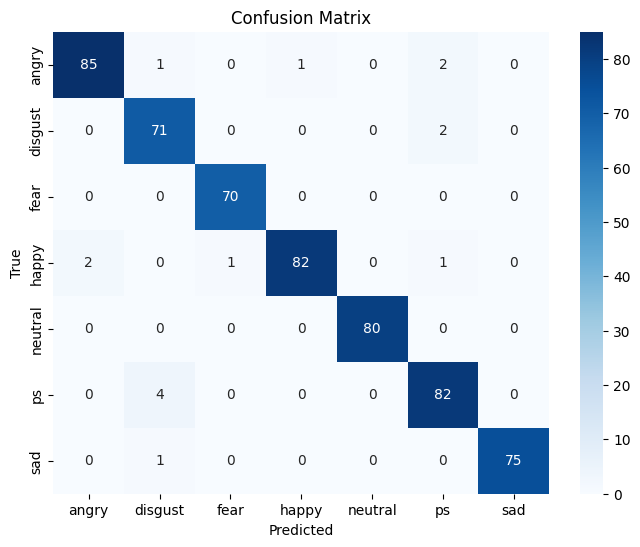

In [ ]:
#Correlation HeatMap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()